# Will you ever get divorced? AI might already know the answer 

Building solid human relationships is hard and finding a committed life partner is even harder. So, is there anything that science can do to help society build stronger marriages? [Dr. John Gottman's](https://en.wikipedia.org/wiki/John_Gottman) has been studying human relationships for decades and following his research on this topic, scientists from the University of Hai'il in Saudi Arabia have studied some Machine Learning & Deep Learning Models that can predict the likelihood of divorce with an accuracy of up to 91.66% according to [this paper](https://www.nature.com/articles/s41598-023-50839-1). The study is based on a series of 54 questions poll among 132 participants (116 married and 32 divorced) in the Ha'il Region of Saudi Arabia following  research on couple therapy.

In this article I'll show you how to build Machine Learning models to predict the likelihood of divorce using the [Divorce Predictions Data Set](https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set) from the UCI Machine Learning Repository. We'll also use Unsupervised Learning techniques to try to understand what do stable marriages have in common.

## Pre-requisites
The Software Ecosystem for ML/AI projects in Python is typically composed of the following tools:

- Python 3.6+
- Jupyter Notebook
- Pandas
- Numpy
- Scikit-learn
- Matplotlib
- Plotly

This article assumes you already have some basic knowledge of such tools as well as some basic understanding of Machine Learning concepts. We don't intend to make a full course on such topics here, but we'll try to explain the concepts as we go.

## The Data

The dataset comprises 54 single choice questions with 5 different values, so we have 54 categorical features along with a binary target variable that indicates whether the copule ended up divorcing or not.

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


dataFrame = pd.read_csv('./data/divorce_data.csv', delimiter=';')
dataFrame.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


Let's check the shape (number of rows and columns) of the dataset:

In [81]:
dataFrame.shape

(170, 55)

Now let's check how did pandas load the data types:

In [82]:
dataFrame.dtypes

Q1         int64
Q2         int64
Q3         int64
Q4         int64
Q5         int64
Q6         int64
Q7         int64
Q8         int64
Q9         int64
Q10        int64
Q11        int64
Q12        int64
Q13        int64
Q14        int64
Q15        int64
Q16        int64
Q17        int64
Q18        int64
Q19        int64
Q20        int64
Q21        int64
Q22        int64
Q23        int64
Q24        int64
Q25        int64
Q26        int64
Q27        int64
Q28        int64
Q29        int64
Q30        int64
Q31        int64
Q32        int64
Q33        int64
Q34        int64
Q35        int64
Q36        int64
Q37        int64
Q38        int64
Q39        int64
Q40        int64
Q41        int64
Q42        int64
Q43        int64
Q44        int64
Q45        int64
Q46        int64
Q47        int64
Q48        int64
Q49        int64
Q50        int64
Q51        int64
Q52        int64
Q53        int64
Q54        int64
Divorce    int64
dtype: object

Questions were loaded as `int64` integers instead of categories. We need to encoded into categorical variables:

In [83]:
dataFrame_dummies = pd.get_dummies(dataFrame.loc[:, dataFrame.columns != 'Divorce'])
dataFrame_dummies['Divorce'] = dataFrame['Divorce'].astype(int)
dataFrame_dummies.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [84]:
dataFrame_dummies.dtypes

Q1         int64
Q2         int64
Q3         int64
Q4         int64
Q5         int64
Q6         int64
Q7         int64
Q8         int64
Q9         int64
Q10        int64
Q11        int64
Q12        int64
Q13        int64
Q14        int64
Q15        int64
Q16        int64
Q17        int64
Q18        int64
Q19        int64
Q20        int64
Q21        int64
Q22        int64
Q23        int64
Q24        int64
Q25        int64
Q26        int64
Q27        int64
Q28        int64
Q29        int64
Q30        int64
Q31        int64
Q32        int64
Q33        int64
Q34        int64
Q35        int64
Q36        int64
Q37        int64
Q38        int64
Q39        int64
Q40        int64
Q41        int64
Q42        int64
Q43        int64
Q44        int64
Q45        int64
Q46        int64
Q47        int64
Q48        int64
Q49        int64
Q50        int64
Q51        int64
Q52        int64
Q53        int64
Q54        int64
Divorce    int64
dtype: object

Let's see how the data is distributed. Each feature (column) is a question like "When I need it, I can take my discussions with my husband/wife from the beginning and correct it" or "When I argue with my husband/wife, it will eventually work for me to contact him/her" that comes from Dr. Gottman's research on Divorce Prediction Scale study.

The full list of questions is shown below:

In [85]:
questions = pd.read_csv('./data/reference.csv', delimiter='|')
questions.head(n=54)

,atribute_id,description
0,1,If one of us apologizes when our discussion de...
1,2,"I know we can ignore our differences, even if ..."
2,3,"When we need it, we can take our discussions w..."
3,4,"When I discuss with my spouse, to contact him ..."
4,5,The time I spent with my wife is special for us.
5,6,We don't have time at home as partners.
6,7,We are like two strangers who share the same e...
7,8,I enjoy our holidays with my wife.
8,9,I enjoy traveling with my wife.
9,10,Most of our goals are common to my spouse.


Now let's make some exploratory data analysis to understand the data better.


## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. This is the first step in the process of building any Machine Learning Model. The following sections illustrate how this process is typically carried out by Data Scientists and Engineers.

### Data Distribution

In [86]:
dataFrame_dummies.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


### Null or incomplete data

In [87]:
dataFrame_dummies.isna().sum()

Q1         0
Q2         0
Q3         0
Q4         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10        0
Q11        0
Q12        0
Q13        0
Q14        0
Q15        0
Q16        0
Q17        0
Q18        0
Q19        0
Q20        0
Q21        0
Q22        0
Q23        0
Q24        0
Q25        0
Q26        0
Q27        0
Q28        0
Q29        0
Q30        0
Q31        0
Q32        0
Q33        0
Q34        0
Q35        0
Q36        0
Q37        0
Q38        0
Q39        0
Q40        0
Q41        0
Q42        0
Q43        0
Q44        0
Q45        0
Q46        0
Q47        0
Q48        0
Q49        0
Q50        0
Q51        0
Q52        0
Q53        0
Q54        0
Divorce    0
dtype: int64

In [88]:
dataFrame_dummies.isnull().sum()

Q1         0
Q2         0
Q3         0
Q4         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10        0
Q11        0
Q12        0
Q13        0
Q14        0
Q15        0
Q16        0
Q17        0
Q18        0
Q19        0
Q20        0
Q21        0
Q22        0
Q23        0
Q24        0
Q25        0
Q26        0
Q27        0
Q28        0
Q29        0
Q30        0
Q31        0
Q32        0
Q33        0
Q34        0
Q35        0
Q36        0
Q37        0
Q38        0
Q39        0
Q40        0
Q41        0
Q42        0
Q43        0
Q44        0
Q45        0
Q46        0
Q47        0
Q48        0
Q49        0
Q50        0
Q51        0
Q52        0
Q53        0
Q54        0
Divorce    0
dtype: int64

It looks like we don't have any missing values in our dataset. Now let's see how the data is distributed.

### Data Distribution
Histograms and Box plots are useful to see how the data is distributed. Let's plot the histograms for each feature.

In [89]:
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_box_plots(df, cols=4, rows=-1):
    if (rows == -1):
        rows = math.ceil(len(df.columns)/cols)
    fig = make_subplots(
        rows,
        cols,
        subplot_titles = df.columns
    )

    i = 1
    j = 1

    for col in df.columns:
        fig.append_trace(go.Box(y=df[:][col]), i, j)
        if j < cols:
            j += 1
        else:
            j = 1
            i += 1
    fig.update_layout(
        autosize=False,
        width=1200,
        height=2000,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
        paper_bgcolor="LightSteelBlue",
    )
    fig.show()
    
make_box_plots(dataFrame)


In [90]:
def make_histograms(df, cols=4, rows=-1):
    if (rows == -1):
        rows = math.ceil(len(df.columns)/cols)
    fig = make_subplots(
        rows,
        cols,
        subplot_titles = df.columns
    )

    i = 1
    j = 1

    for col in df.columns:
        fig.append_trace(go.Histogram(x=df[:][col]), i, j)
        if j < cols:
            j += 1
        else:
            j = 1
            i += 1
    fig.update_layout(
        autosize=False,
        width=1200,
        height=2000,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
        paper_bgcolor="LightSteelBlue",
    )
    fig.show()

make_histograms(dataFrame)

Histograms show we have a similar number of positive and negative labels in our dataset, which makes it a balanced problem. We can also see that the data is not normally distributed and we have some outliers in some features. Let's remove the outliers and see how the data is distributed after that.

## Features with most influence on the target variable

To measure the extent up to which a variable has influence on the target variable, we use Cramers-V scores, which are based on the $\chi^2$ test. This method is preferred over Pearson's Coefficients for categorical variables such as the ones we're analyzing:

In [91]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

scores = []

for col in dataFrame.columns[dataFrame.columns != 'Divorce']:
    scores.append((col, cramers_v(dataFrame[col], dataFrame['Divorce'])))

cramers_df = pd.DataFrame(scores, columns=['Feature', 'cramers_v'])
cramers_df



,Feature,cramers_v
0,Q1,0.886632
1,Q2,0.865957
2,Q3,0.826766
3,Q4,0.904423
4,Q5,0.915344
5,Q6,0.492607
6,Q7,0.684241
7,Q8,0.904719
8,Q9,0.947790
9,Q10,0.877836


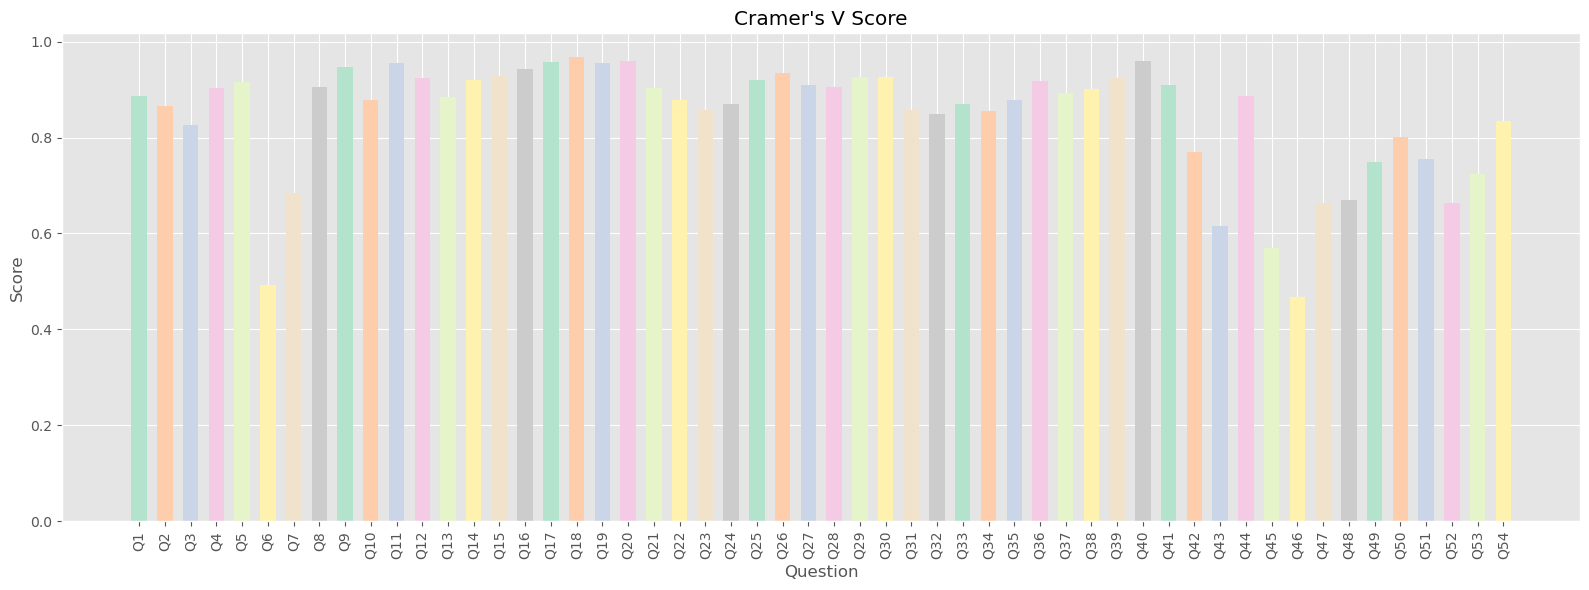

In [92]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 6))
bars = ax.bar(
    cramers_df['Feature'],
    cramers_df['cramers_v'],
    width=0.6,
    color=plt.cm.Pastel2.colors
)
ax.set_title("Cramer's V Score")
ax.set_xlabel("Question")
ax.set_ylabel("Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We can see that every question on the dataset has a significant relation with the target variable, so there's no need for removing unrelated features.

### Target variable distribution

The metrics of some algorithms are affected by the number of samples of each class. If we have more individuals from a class than others, this might cause our model to perform poorly when predicting results for individuals from under-represented classes. Let's see how the target variable is distributed.

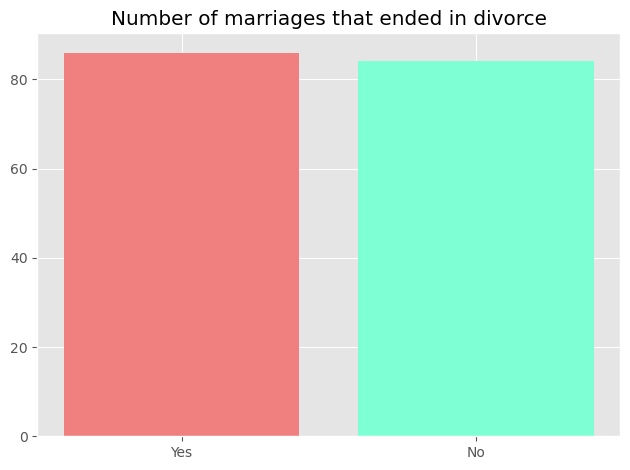

In [93]:
fig, ax = plt.subplots()
ax.bar(np.array(['Yes', 'No']), dataFrame['Divorce'].value_counts(), color=['lightcoral', 'aquamarine'])
ax.set_title('Number of marriages that ended in divorce')
fig.tight_layout()
plt.show()



We have a similar number of positive and negative labels in our dataset, which makes it a balanced problem. This is the ideal scenario for running classification algorithms.

### Dimensionality Reduction

Dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables.

When we have datasets with a large number of features, it's a good idea to reduce the number of features to make the model simpler and easier to understand. This can also help to reduce the time it takes to train the model and will give us the ability to visualize the data in 2D or 3D.

Principal Component Analysis is a popular technique for dimensionality reduction. It works by finding the directions in which the data varies the most. These directions are called Principal Components. Let's see how can we perform PCA using the Prince library and Python.

In [94]:
from prince import PCA as PCA_Prince

pca = PCA_Prince(n_components=2).fit(dataFrame_dummies)
correlations =pca.column_correlations
row_coords = pca.row_coordinates(dataFrame_dummies)
contributions = pca.row_contributions_
cos2_ind = pca.row_cosine_similarities
percentage_of_variance = pca.percentage_of_variance_


In [95]:
row_coords[0]

0     -3.134520
1      4.069055
2      1.613955
3      3.394265
4     -3.550848
         ...   
165   -5.255161
166   -5.470767
167   -5.311355
168   -5.361092
169   -5.221370
Name: 0, Length: 170, dtype: float64

With the variables above, now we can make some 2D plots:

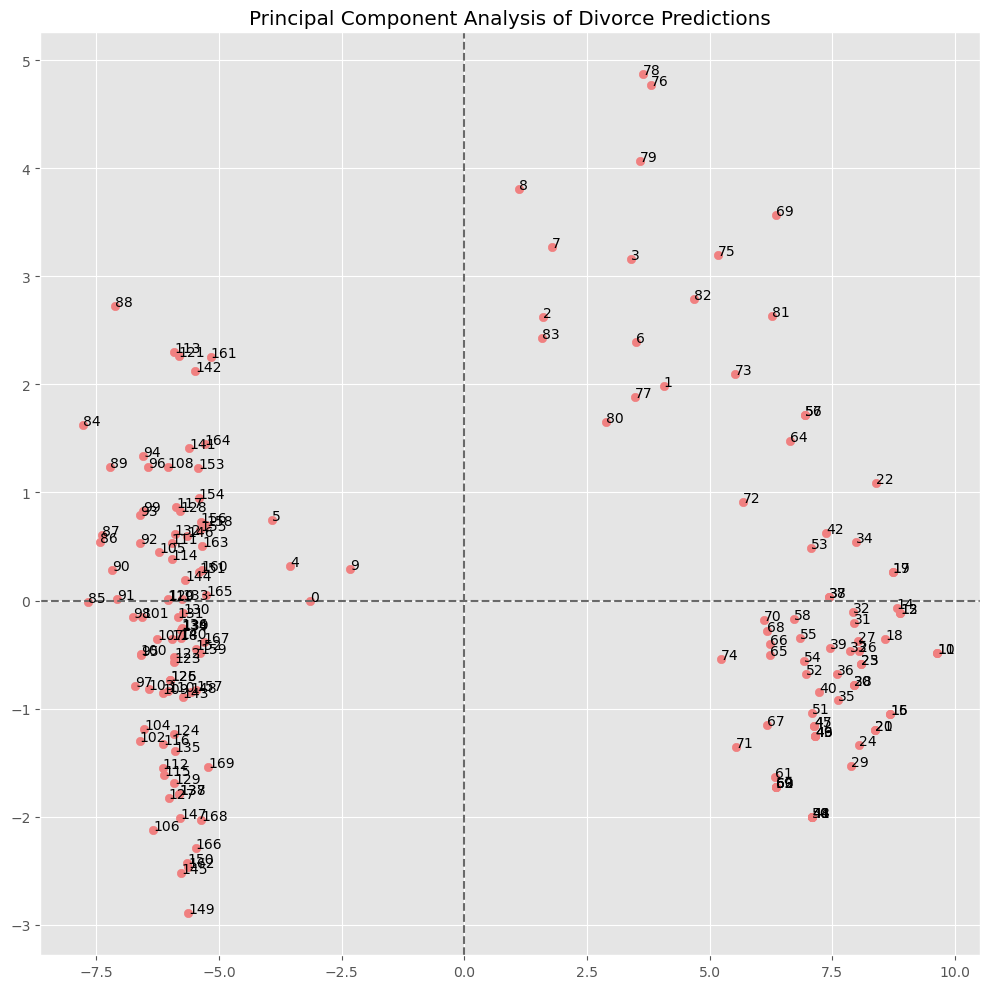

In [96]:
x = row_coords[0].values
y = row_coords[1].values
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))
plt.scatter(x, y, color='lightcoral')
plt.title('Principal Component Analysis of Divorce Predictions')
plt.axhline(y = 0, color = 'dimgrey', linestyle = '--')
plt.axvline(x = 0, color = 'dimgrey', linestyle = '--')
inertia_x = round(percentage_of_variance[0], 2)
inertia_y = round(percentage_of_variance[1], 2)
for i, txt in enumerate(row_coords.index):
    plt.annotate(txt, (x[i], y[i]))
plt.tight_layout()


The plot above shows how data is distributed along the two Principal Components. Clearly, we can see that we have two distinct groups in our dataset which basically tell us which group of questions will lead to a divorce and which won't.

## Explainability
Explainability is the ability to explain how a model works and why it makes the predictions it does. It's important to understand how the model works so we can trust it and take action based on its predictions.

When working in Artificial Intelligence, Machine Learning or Deep Learning, it's important to start with those algorithms that are easier to understand and explain. For instance, Neural Networks are very powerful but they're also very hard to understand and explain. On the other hand, Decision Trees are very easy to understand and explain.

![Interpretability of ML Models](nterpretability-vs-Flexibility-of-ML-algorithms.png)

Now, we're finally ready to train our first model. We'll start with the K-Nearest Neighbours algorithm, which has a good explainability, it's easier to train and understand and performs well in balanced datasets. In the next article of this series, we'll continue exploring other algorithms, including those used by the Hai'il University study, such as Naive Bayes, Random Forest, as well as Artificial Neural Networks.

### Train/Test Split

When training a Machine Learning model, we need to split the dataset into two parts: the training set and the test set. The training set is used to train the model, while the test set is used to evaluate the model's performance. The test set is used to simulate how the model will perform in the real world.

If we wouldn't do this, the model would memorize the data and would perform well on the training set but poorly on the test set. This is called overfitting. Let's split our dataset into training and test sets.

We'll start by using our pruned dataset, and then we'll train a model using PCA as point of comparison.

Since the dataset is rather small, we'll use a training/testing split of 60%/40% so that we can have more individuals to make predictions on while reducing the risk of overfitting.

In [97]:
from sklearn.model_selection import train_test_split

knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(dataFrame_dummies.drop(columns=['Divorce']), dataFrame_dummies['Divorce'], test_size=0.4, random_state=42)

### Standardization
KNN is an algorithm that's based on distances. Whenever we use distances in an ML algorithm, we should standardize the data, as this can significantly affect measurements. However, for this specific dataset, all values are already within the 0-4 scale, so we don't need to standardize them.


### K-Nearest Neighbours without PCA

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(knn_X_train, knn_y_train)
knn_y_pred = knn.predict(knn_X_test)
knn_accuracy = accuracy_score(knn_y_test, knn_y_pred)
knn_accuracy

0.9705882352941176

In [99]:
knn_recall = recall_score(knn_y_test, knn_y_pred)
knn_recall

0.9444444444444444

In [100]:
from sklearn.metrics import precision_score

knn_precision = precision_score(knn_y_test, knn_y_pred)
knn_precision

1.0

In [101]:
from sklearn.metrics import accuracy_score

knn_accuracy = accuracy_score(knn_y_test, knn_y_pred)
knn_accuracy

0.9705882352941176

In [102]:
from sklearn.metrics import mean_squared_error

knn_mse = mean_squared_error(knn_y_test, knn_y_pred)
knn_mse

0.029411764705882353

Let's create a DataFrame for storing our model scores for later comparison:

In [103]:
performance_ds = pd.DataFrame([{'Model Name': 'KNN', 'Precision': knn_precision, 'Recall': knn_recall, 'Accuracy': knn_accuracy, 'MSE': knn_mse}])
performance_ds.head()

,Model Name,Precision,Recall,Accuracy,MSE
0,KNN,1.0,0.944444,0.970588,0.029412


#### Confusion Matrix

The Confusion Matrix is a plot of how many samples were correctly classified and how many were misclassified. It gives us a sense of how well our model is performing. Let's plot the confusion matrix for our model.

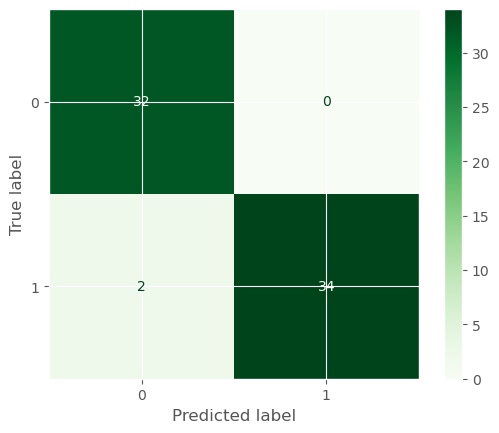

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn, knn_X_test, knn_y_test, cmap='Greens')

So we have 32 samples correctly classified as not divorced, no samples of non divorced couples mis-classified as divorced, 2 sample of divorced couples mis-classified as not-divorced and 34 samples of divorced couples correctly classified as divorced. The seems to have a good performance with a 97% of accuracy, 94.4% of recall, 100% precision scores, and 2.94% of Mean Squared Error.

When evaluating classification models, we can't just use a single metric. Depending on the problem and on whether it's a balanced problem or not, we need to also take into account precision and recall. In this case, we have a balanced problem and since predicting divorces is more important that predicting couples that stay together, we use accuracy along with precision to evaluate our model.

In unbalanced problems where we have more data of one class than the other, we might need to take a different approach.

### K-Nearest Neighbours with PCA

In [105]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(row_coords, dataFrame['Divorce'], test_size=0.4, random_state=42)
knn_pca = KNeighborsClassifier(n_neighbors=15)
knn_pca.fit(pca_X_train, pca_y_train)
knn_pca_y_pred = knn_pca.predict(pca_X_test)
knn_pca_accuracy = accuracy_score(pca_y_test, knn_pca_y_pred)
knn_pca_accuracy


0.9705882352941176

In this case we're getting an accuracy of 97.06% instead of the 100% we got before. This is because of the dimensionality reduction that turned the 54 features into 2, as KNN is an algorithm that's known to perform not so well in high-dimensional spaces.

Notice how this is a better model than the one we trained before, as it's less likely to overfit the data. Let's plot the confusion matrix for this model.

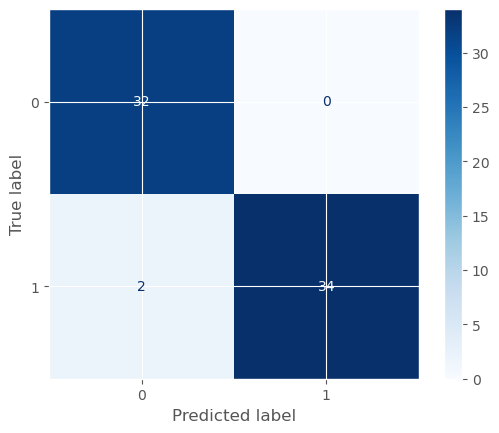

In [106]:
ConfusionMatrixDisplay.from_estimator(knn_pca, pca_X_test, pca_y_test, cmap='Blues')


The confusion matrix for this model didn't change from the previous one.

### Conclusion
So far we have learned how to:

- load and preprocess a dataset
- perform Exploratory Data Analysis
- plot histograms and box plots to get a visual representation of the data
- detect and remove outliers
- tell whether the problem is balanced or not
- plot the correlation matrix and remove irrelevant features
- choose a good model as starting point for training while preserving explainability
- perform PCA and plot the Principal Components Analysis
- split the dataset into training and test sets
- train a K-Nearest Neighbours model and evaluate its performance
- plot the confusion matrix for the model

In the next article, we'll continue exploring other algorithms such as Naive Bayes, Random Forest, and Artificial Neural Networks. Stay tuned!